In [1]:
import torch 
from torch.autograd import Variable 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
#creating the dataset

A,B = [],[]
for _ in range(100):
    r = random.random() * 10
    r = math.ceil(r)
    A.append(r)
for _ in range(100):
    r = random.random() * 10
    r = math.ceil(r)
    B.append(r)
print(A, B)


[6, 1, 4, 2, 4, 7, 7, 4, 5, 6, 8, 6, 7, 10, 3, 6, 8, 10, 1, 10, 2, 4, 5, 3, 1, 8, 6, 7, 9, 6, 9, 9, 9, 9, 8, 2, 4, 7, 1, 1, 9, 4, 6, 8, 7, 3, 5, 4, 1, 5, 2, 3, 9, 5, 10, 4, 2, 8, 5, 4, 8, 6, 8, 8, 8, 4, 3, 1, 5, 9, 8, 7, 2, 7, 2, 8, 3, 10, 2, 9, 10, 7, 5, 2, 1, 9, 4, 9, 3, 8, 8, 10, 2, 4, 4, 6, 8, 6, 2, 5] [8, 5, 5, 9, 3, 4, 6, 5, 1, 4, 8, 9, 8, 2, 5, 5, 2, 3, 2, 2, 7, 9, 3, 2, 4, 4, 5, 9, 1, 5, 5, 9, 2, 10, 4, 10, 7, 5, 9, 3, 5, 7, 8, 8, 8, 6, 9, 1, 7, 5, 4, 3, 9, 3, 2, 5, 1, 2, 7, 8, 9, 7, 1, 10, 4, 8, 10, 7, 5, 6, 7, 8, 7, 3, 10, 9, 7, 5, 2, 8, 7, 3, 9, 5, 3, 1, 8, 6, 8, 10, 1, 3, 10, 4, 10, 4, 6, 2, 10, 10]


In [3]:
n=len(A)
print(n)


100


In [4]:
A,B=np.array(A),np.array(B)
A = A.reshape(n,1)
B = B.reshape(n,1)

X = np.concatenate((A, B), axis = 1)
y = A+B

In [5]:

print(type(X))


<class 'numpy.ndarray'>


In [7]:
#converting to tensors
datatype = torch.FloatTensor
Dx, Dy = 2, 1
X = Variable(torch.Tensor(X).type(datatype), requires_grad=False)

y = Variable(torch.Tensor(y).type(datatype), requires_grad=False)

w = Variable(torch.randn(Dx, Dy).type(datatype), requires_grad=True)


In [8]:
#Initialising our model.
#Declaring the forward pass.
class LinearRegressionModel(torch.nn.Module): 
  
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(2, 1)  # Two in and one out 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 

In [9]:
# creating the object of class
our_model = LinearRegressionModel() 

In [10]:
#setting loss function as mean square error
criterion = torch.nn.MSELoss(size_average = False) 

#setting criterion as stochastic gradient descent
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.0001,momentum=0.9) 



In [11]:
#Traning the model in 1000 iteration 
error=[]
for epoch in range(500): 
  
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    pred_y = our_model(X) 
  
    # Compute and print loss 
    loss = criterion(pred_y, y) 
  
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    error.append(float(loss))
    optimizer.step() 
    print('epoch {}, loss {}'.format(epoch, loss.data[0])) 

/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch 0, loss 21373.40625
epoch 1, loss 3967.359619140625
epoch 2, loss 6009.76416015625
epoch 3, loss 679.1766357421875
epoch 4, loss 1645.025634765625
epoch 5, loss 103.00408172607422
epoch 6, loss 440.24359130859375
epoch 7, loss 12.999261856079102
epoch 8, loss 115.51152801513672
epoch 9, loss 1.1795706748962402
epoch 10, loss 29.706249237060547
epoch 11, loss 0.05359223857522011
epoch 12, loss 7.484132289886475
epoch 13, loss 0.026404766365885735
epoch 14, loss 1.8527920246124268
epoch 15, loss 0.03353720158338547
epoch 16, loss 0.4553772509098053
epoch 17, loss 0.024862585589289665
epoch 18, loss 0.11494521051645279
epoch 19, loss 0.01631665602326393
epoch 20, loss 0.03346925601363182
epoch 21, loss 0.01171048078685999
epoch 22, loss 0.01431985106319189
epoch 23, loss 0.009715462103486061
epoch 24, loss 0.009852557443082333
epoch 25, loss 0.008900494314730167
epoch 26, loss 0.008758709765970707
epoch 27, loss 0.008538700640201569
epoch 28, loss 0.00842209905385971
epoch 29, loss 

epoch 323, loss 0.0008943071006797254
epoch 324, loss 0.0008874747436493635
epoch 325, loss 0.0008807446574792266
epoch 326, loss 0.0008740756893530488
epoch 327, loss 0.0008675400167703629
epoch 328, loss 0.0008610417717136443
epoch 329, loss 0.0008545071468688548
epoch 330, loss 0.0008479466196149588
epoch 331, loss 0.0008415826596319675
epoch 332, loss 0.0008352808654308319
epoch 333, loss 0.0008288988028652966
epoch 334, loss 0.0008227509679272771
epoch 335, loss 0.0008164708851836622
epoch 336, loss 0.0008104324224404991
epoch 337, loss 0.000804307812359184
epoch 338, loss 0.000798134773503989
epoch 339, loss 0.0007921104552224278
epoch 340, loss 0.0007860345067456365
epoch 341, loss 0.0007800858002156019
epoch 342, loss 0.0007742369780316949
epoch 343, loss 0.0007684459560550749
epoch 344, loss 0.0007627209415659308
epoch 345, loss 0.0007569435983896255
epoch 346, loss 0.0007510935538448393
epoch 347, loss 0.0007455490995198488
epoch 348, loss 0.0007397489389404655
epoch 349, los

Text(0, 0.5, 'error')

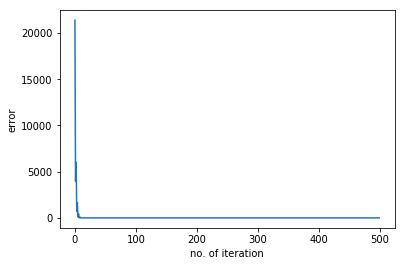

In [15]:
#plotting the error
plt.plot(error,label='loss')
plt.xlabel('no. of iteration')
plt.ylabel('error')


In [13]:
#predicting fibonacci using the model
a=int(input('enter the value of a'))
b=int(input('enter the value of b'))
n=int(input('enter n'))
series=[a,b]
for i in range(n+1):
    c=np.array([a,b])
    c=c.reshape(1,-1)
    c=Variable(torch.Tensor(c))
    pred_y = our_model(c)
    series.append(round(float(pred_y)))

    a=b
    b=round(float(pred_y))
print(series)

enter the value of a2
enter the value of b3
enter n10
[2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]
